>
> # MaaS Sim tutorial
>
> ## Graphs, road networks, osm imports, graph searches
>
-----
* we use `networX` to work with the graphs,
* we use `osmNX` to download and import OpenStreetMap networks

In [1]:
#small imports
import os
import sys
import random
import time
import pprint
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16, 16]
#big imports
import osmnx as ox #OSM download and parse
import pandas as pd 
import networkx as nx #graphs
# local imports
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from MaaSSim.utils import get_config

**parameterization**

In [2]:
params = get_config('../../data/config/default.json')

# Graphs
`osmnx` extends the `networkx` with `OpenStreetMap` importer and works like charm

--- 
### 1. Import driveable network for `Delft`

In [3]:
G = ox.graph_from_place('Delft, Netherlands', network_type='drive')

### 2. Plot it

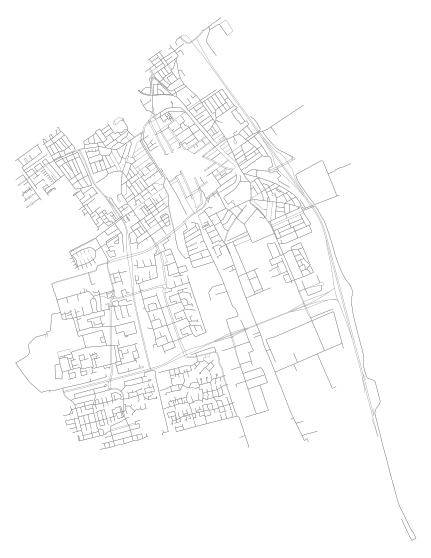

In [4]:
_ = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_linewidth=0.3,
                            show=False, close=False,
                            edge_color='grey', bgcolor='white')

#### * Network stats

In [5]:
pprint.pprint(ox.basic_stats(G))

{'circuity_avg': 1.0861435163483804,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 89.26891729034723,
 'edge_length_total': 465180.32799999946,
 'intersection_count': 1789,
 'intersection_density_km': None,
 'k_avg': 4.681940700808625,
 'm': 5211,
 'n': 2226,
 'node_density_km': None,
 'self_loop_proportion': 0.005948954135482633,
 'street_density_km': None,
 'street_length_avg': 91.88887951411708,
 'street_length_total': 279893.52700000064,
 'street_segments_count': 3046,
 'streets_per_node_avg': 2.738993710691824,
 'streets_per_node_counts': {0: 0, 1: 437, 2: 63, 3: 1382, 4: 332, 5: 12},
 'streets_per_node_proportion': {0: 0.0,
                                 1: 0.1963162623539982,
                                 2: 0.02830188679245283,
                                 3: 0.6208445642407907,
                                 4: 0.14914645103324348,
                                 5: 0.005390835579514825}}


### 3. Graph data

In [6]:
G.get_edge_data(1501364225, 1402613311)

{0: {'osmid': 136852791,
  'oneway': True,
  'lanes': '1',
  'name': 'Brasserskade',
  'highway': 'unclassified',
  'maxspeed': '50',
  'length': 14.888}}

#### DataFrame and .csv export

In [7]:
df = nx.to_pandas_edgelist(G)
df.head()

,source,target,lanes,name,osmid,width,access,oneway,bridge,highway,ref,length,geometry,tunnel,junction,maxspeed
0,1501364225,1402613311,1,Brasserskade,136852791,NaN,NaN,True,NaN,unclassified,NaN,14.888,NaN,NaN,NaN,50
1,1501364225,1501364218,3,Brasserskade,136852797,NaN,NaN,True,NaN,secondary,NaN,86.030,"LINESTRING (4.362211 52.0275607, 4.3622056 52....",NaN,NaN,50
2,1269112834,626146739,1,Pierre van Hauwelaan,"[131635875, 812784588, 131635877]",NaN,NaN,True,yes,tertiary,NaN,229.396,"LINESTRING (4.3500691 51.9964222, 4.3492182 51...",NaN,NaN,50
3,44875780,44875431,NaN,Vernieuwde Boogerd,7538524,NaN,NaN,False,NaN,living_street,NaN,22.932,NaN,NaN,NaN,15
4,44875780,1371031431,NaN,Koningsplein,364437785,NaN,NaN,False,NaN,living_street,NaN,55.130,NaN,NaN,NaN,15


### 4. Graph searches 

In [8]:
node_list = list(G.nodes)
o = random.choice(node_list)
d = random.choice(node_list)

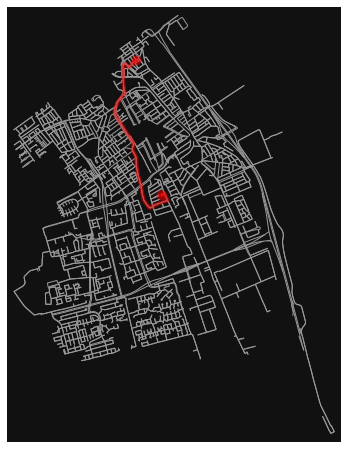

In [9]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, o, d, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [10]:
print("Shorthest path from node {} to node {} distance: {}m".format(o,d,nx.shortest_path_length(G, o, d, weight='length')))

Shorthest path from node 1580679751 to node 44894640 distance: 3396.1090000000004m


### 5. Skim matrices

In [11]:
skim = dict(nx.all_pairs_dijkstra_path_length(G, weight = 'length')) # may take some time

In [12]:
o = random.choice(node_list)
d = random.choice(node_list)
print("From node {} to node {} distance: {}m".format(o,d,round(skim[o][d])))

From node 2047160808 to node 1552650958 distance: 5834m


-----
# Download own data for simulations
Here we download city graph, compute the skims and save to graphml and csvs
It loads data for `params.city` computes the skim, saves the files into `params.paths.skim` and `params.paths.G`

<font color='red'>this takes quite a time</font>

In [13]:
# params.city = 'Den Haag, Netherlands'
# make_paths() #update file paths
# inData = download_G(inData) # download the graph and compute the skim
# save_G(inData) # save it to params.paths.G

now you should have in '../data/graphs' two files fo each city (graph and skim)

-------------
Rafal Kucharski, 2019, Delft, r.m.kucharski@tudelft.nl